In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
gazp = pd.read_csv('GAZP.txt')
rosn = pd.read_csv('ROSN.txt')

In [59]:
rosn.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ROSN,D,20190926,0,424.95,425.95,422.05,422.55,2115650
1,ROSN,D,20190927,0,422.50,424.75,422.20,422.50,1732000
2,ROSN,D,20190930,0,422.20,422.50,419.30,419.30,2328750
3,ROSN,D,20191001,0,420.10,423.25,419.90,420.65,2429320
4,ROSN,D,20191002,0,420.70,422.25,415.80,417.55,3421860


In [60]:
res = pd.merge(rosn, gazp, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<OPEN>_x,<HIGH>_x,<LOW>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<OPEN>_y,<HIGH>_y,<LOW>_y,<CLOSE>_y,<VOL>_y
0,ROSN,D,20190926,0,424.95,425.95,422.05,422.55,2115650,GAZP,D,0,228.74,233.70,228.31,231.97,40372280
1,ROSN,D,20190927,0,422.50,424.75,422.20,422.50,1732000,GAZP,D,0,231.95,232.14,229.01,229.01,13552170
2,ROSN,D,20190930,0,422.20,422.50,419.30,419.30,2328750,GAZP,D,0,229.03,229.46,225.90,225.90,26468400
3,ROSN,D,20191001,0,420.10,423.25,419.90,420.65,2429320,GAZP,D,0,225.99,227.70,225.17,226.49,16729200
4,ROSN,D,20191002,0,420.70,422.25,415.80,417.55,3421860,GAZP,D,0,226.20,226.65,223.25,223.60,31853130


In [61]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

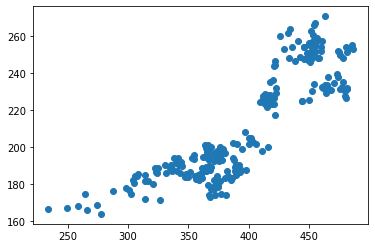

In [62]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [63]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors


In [64]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)


0
0
initial error: 22673.120466800006


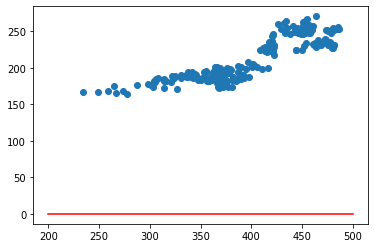

In [65]:
X0 = np.linspace(200, 500, 120)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 105.46063722083343


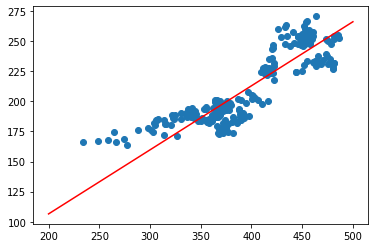

In [66]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)


#error after gradient descent: 6734.135540194945

X0 = np.linspace(200, 500, 120)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


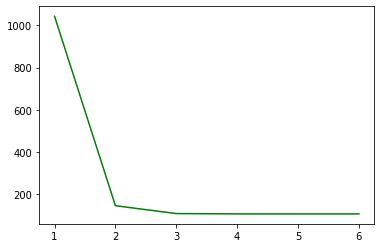

In [67]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()
